## В этом ipynb выполним следующую задачу (практическое задание 1.9 на тему погрешности по выч. математике, МФТИ, осень 2022)

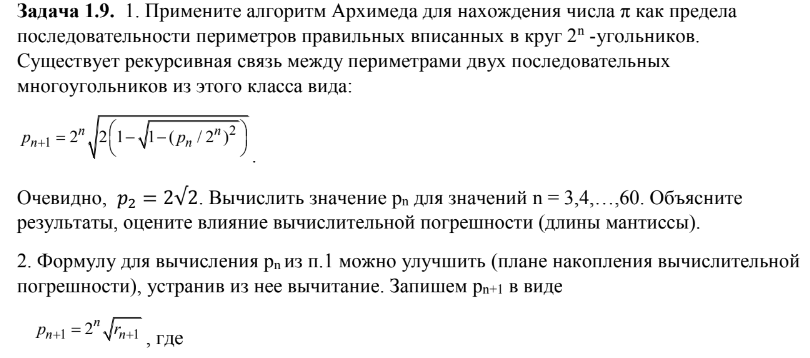

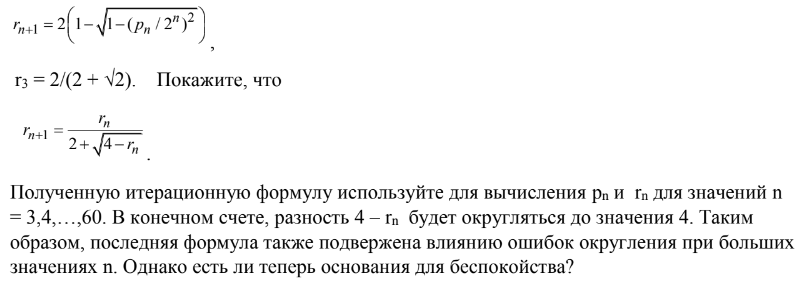

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

In [28]:
#Рекурсивная функция, считающая периметр 2**n прямоугольника,
#вписанного в окружность диаметра 1, т.е этот периметр равен числу Пи.
def calculate_perim(n = 2):
    if n <= 2 :
        return 2 * m.sqrt(2)
    sqr_ratio = m.power(( calculate_perim(n - 1) / m.power(2, n-1)), 2)
    global_sqrt = m.sqrt(2 * (1 - m.sqrt( 1 - sqr_ratio ))) 
    return m.power(2, n-1) * global_sqrt

In [29]:
#Функция, строящая график
def plot(values, perimeters):
    plt.figure(figsize=(8, 5))
    plt.plot(values, perimeters, color = 'orange')
    plt.xlabel("n of $2^n$-angle")
    plt.ylabel("$\pi$")
    plt.title("Pi calculating")
    plt.grid()
    plt.show()
    #Функция, строящая график в логарифм. масштабе отн. оХ
    
def plot_log(values, perimeters):
    plt.figure(figsize = (8, 5))
    plt.plot(values, perimeters, color = 'orange')
    plt.xlabel("n of $2^n$-angle")
    plt.ylabel("$\pi - \pi_{calculated}$")
    #plt.xscale('log')
    #matplotlib.scale.LogScale(x, base=0.5)
    #plt.xscale('log', base = 10)
    plt.yscale('log')
    plt.title("Pi calculating")
    plt.grid()
    plt.show()

### Выполним априорную оценку того, как будет работать 1-я и 2-я формулы в вычислениях

Для начала, приведём некоторые выкладки к формуле, обозначенной в пункте 1: вписывая 4, 8, 16 ... - угольники в окружность, мы можем заметить, что сторона $2^{n+1}$ угольника связана со стороной $2^n$ - угольника (в этой последовательности) следующим отношением: $$a_{n+1} = \sqrt{\left(\dfrac {a_n}{2} \right )^2 + \left(r - \sqrt{r^2 - \left(\dfrac{a_n}{2} \right ) ^2 } \right) ^ 2}$$


Где r - радиус окружности. При этом периметр квадрата, вписанного в единичную окружность, равен $ 2 \sqrt{2}$. Откуда и получается формула, объявленная в пункте 1(периметры многоугольников, вписанных в единичную окружность).

В итоге, формула приводится к виду: $$p_{n+1} = 2^n \sqrt{2 \left(1 - \sqrt{1 - \left(\dfrac{p_n}{2^n} \right ) ^2 } \right)}$$

Сразу видна проблема: величина $ \left(1 - \sqrt{1 - \left(\dfrac{p_n}{2^n}\right)^2}\right)  \rightarrow 0$ очень быстро при $n \rightarrow \infty$. 

В тот момент, когда $ \left(\dfrac{p_n}{2^n}\right)^2 < \epsilon_{mash}$, в машинной арифметике происходит следующее: $1 - \left(\dfrac{p_n}{2^n}\right)^2 = 1 - 1 = 0$, и метод выдаёт, что pi = 0. 

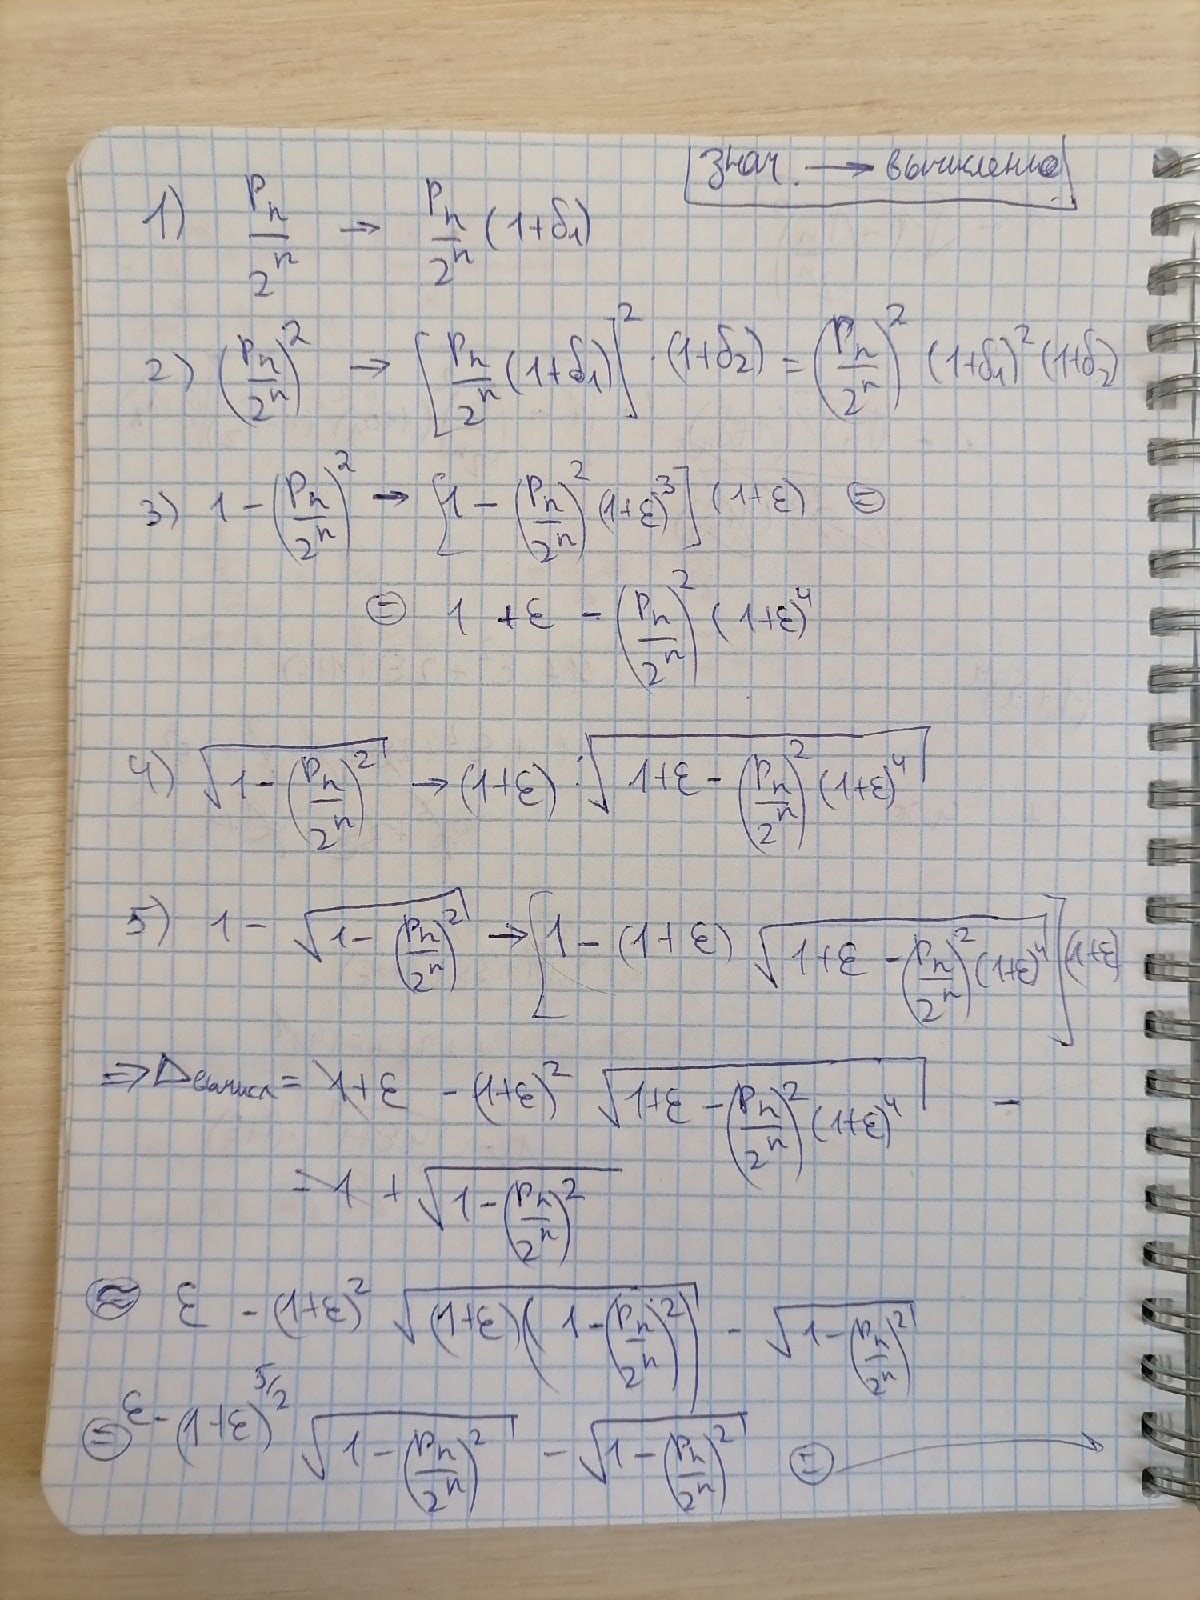

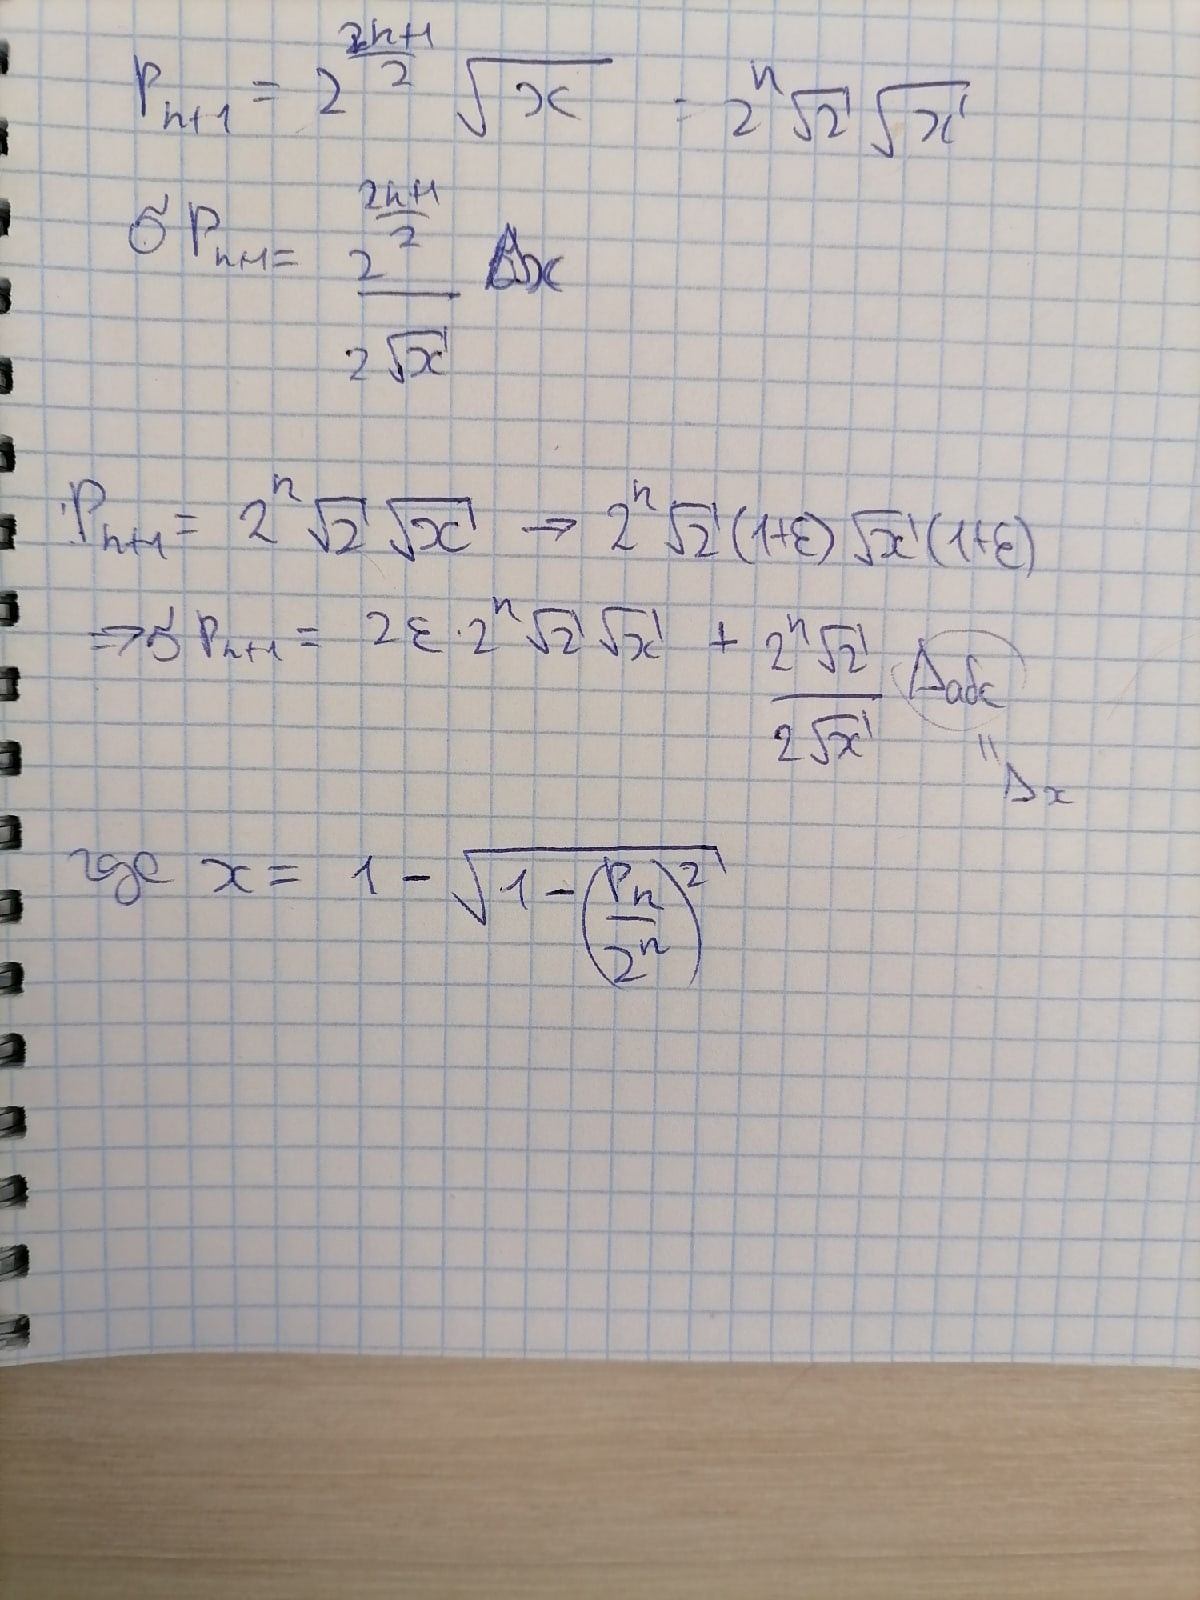

###### В качестве табличного значения pi будем использовать следующее (возьмём 100 знаков мантиссы): 

In [30]:
import mpmath as m
m.mp.dps = 100  # set number of digits
pi = m.pi
print(pi)   # print pi with your num of digits

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068


Посмотрим, что происходит в случае мантиссы 25 (проверим это)

In [31]:
m.mp.dps = 25 ##возьмём длину мантиссы 25

In [32]:
eps = m.mpf(1)
while 1 + eps > 1:
    eps /= 2
eps ## определили эпс. машинное

mpf('1.292469707114105741986576081e-26')

Значения вычислительной ошибки :
3 5.893431950747342443194862e-23
4 2.358717585525080199725381e-22
5 9.436215302344294076377553e-22
6 3.77462062083764864190771e-21
7 1.509861698421941449582297e-20
8 6.039460243798870048397237e-20
9 2.415785442531264001019857e-19
10 9.663143115136923374616603e-19
11 3.865257380555959871677096e-18
12 1.546102965672503094532795e-17
13 6.184411876140131557297754e-17
14 2.473764751801064559739723e-16
15 9.895059008549270440298131e-16
16 3.958023603554209886015203e-15
17 1.583209441435134125395777e-14
18 6.332837765753994081275845e-14
19 2.533135106302930624714413e-13
20 1.013254042521254486045376e-12
21 4.053016170084423230049405e-12
22 1.62120646803438210227556e-11
23 6.484825872147104974944825e-11
24 2.593930348828247226897167e-10
25 1.037572139531299043024367e-9
26 4.150288558125196324362969e-9
27 1.660115422623466613469148e-8
28 6.640461670442284763194844e-8
29 0.0000002656184652135648760046348
30 0.000001062473886520284436489273
31 0.000004249895135424

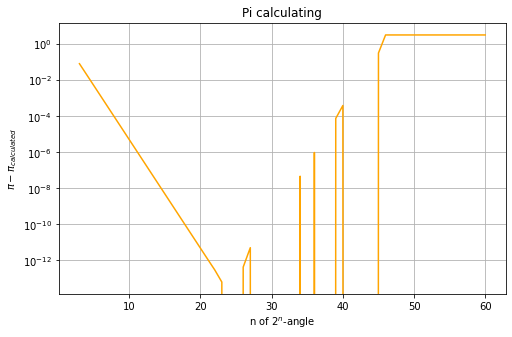

In [38]:
values = np.arange(3, 61)
#print(values)
perimeters = np.array(list(map(calculate_perim, values)))
powers_2 = np.array((list((map(lambda x: m.power(2,x), values)))))
print("Значения вычислительной ошибки :")
arr = (perimeters/powers_2)**2
for i in range(3,40):
    abs_x = eps + 2.5*eps*m.sqrt(1-arr[i])
    x = 1 - m.sqrt(1-arr[i])
    sigma_perim = powers_2[i] * m.sqrt(2) * (abs_x)/(2 * m.sqrt(x))
    #print(arr[i])
    print (i, sigma_perim)

#print(powers_2 * m.sqrt(2) * m.sqrt(eps))
    
for i in np.arange(3, 61):
    #print(i, perimeters[i - 3], "  sigma:", pi - perimeters[i - 3] )
    perimeters[i-3] = pi - perimeters[i-3]
#print("  ", pi) 
#print("Точное значение (25 знаков)")
plot_log(values, perimeters)

Да, действительно: сопоставляя оцененную нами вычислительную ошибку и ошибку фактическую (сумма вычислительной ошибки и ошибки метода) мы видим, что после примерно 23 шага вычислительная ошибка начинает преобладать, пока не вырождается и не накапливается до критической отметки (pi = 0).

#### Оценим вычислительную ошибку метода 2

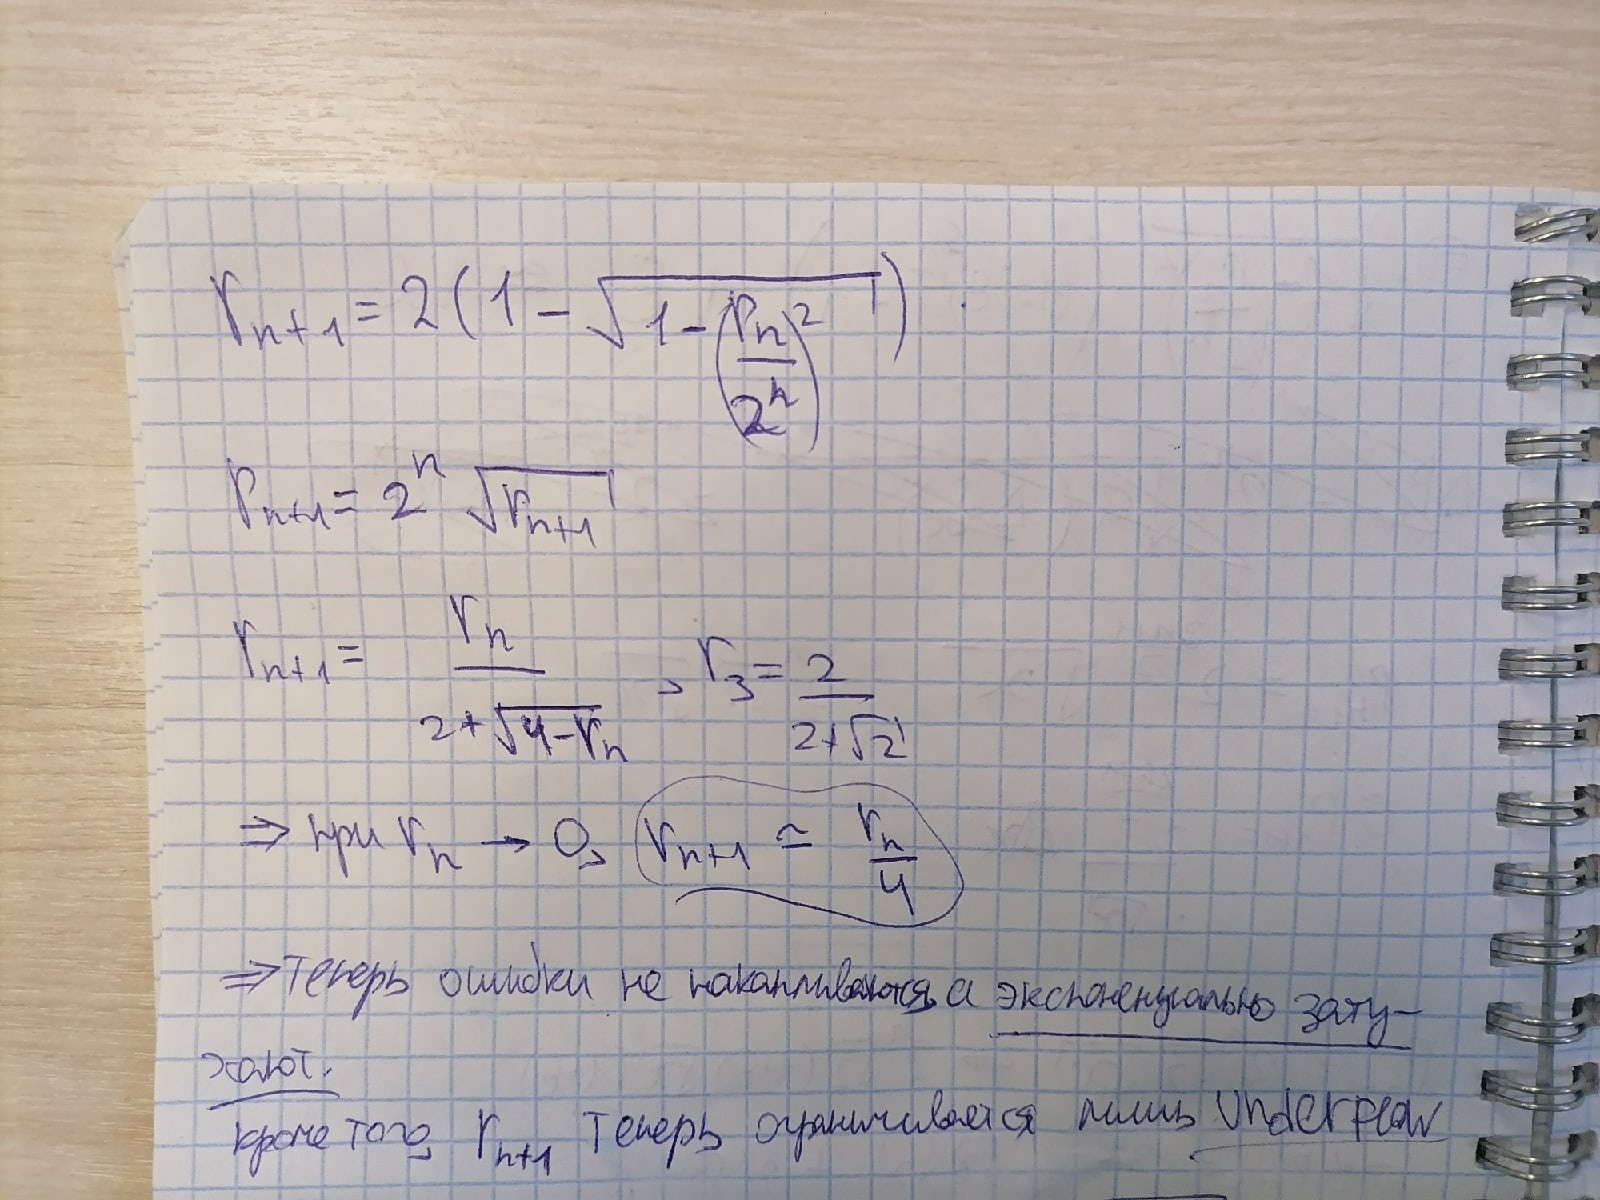

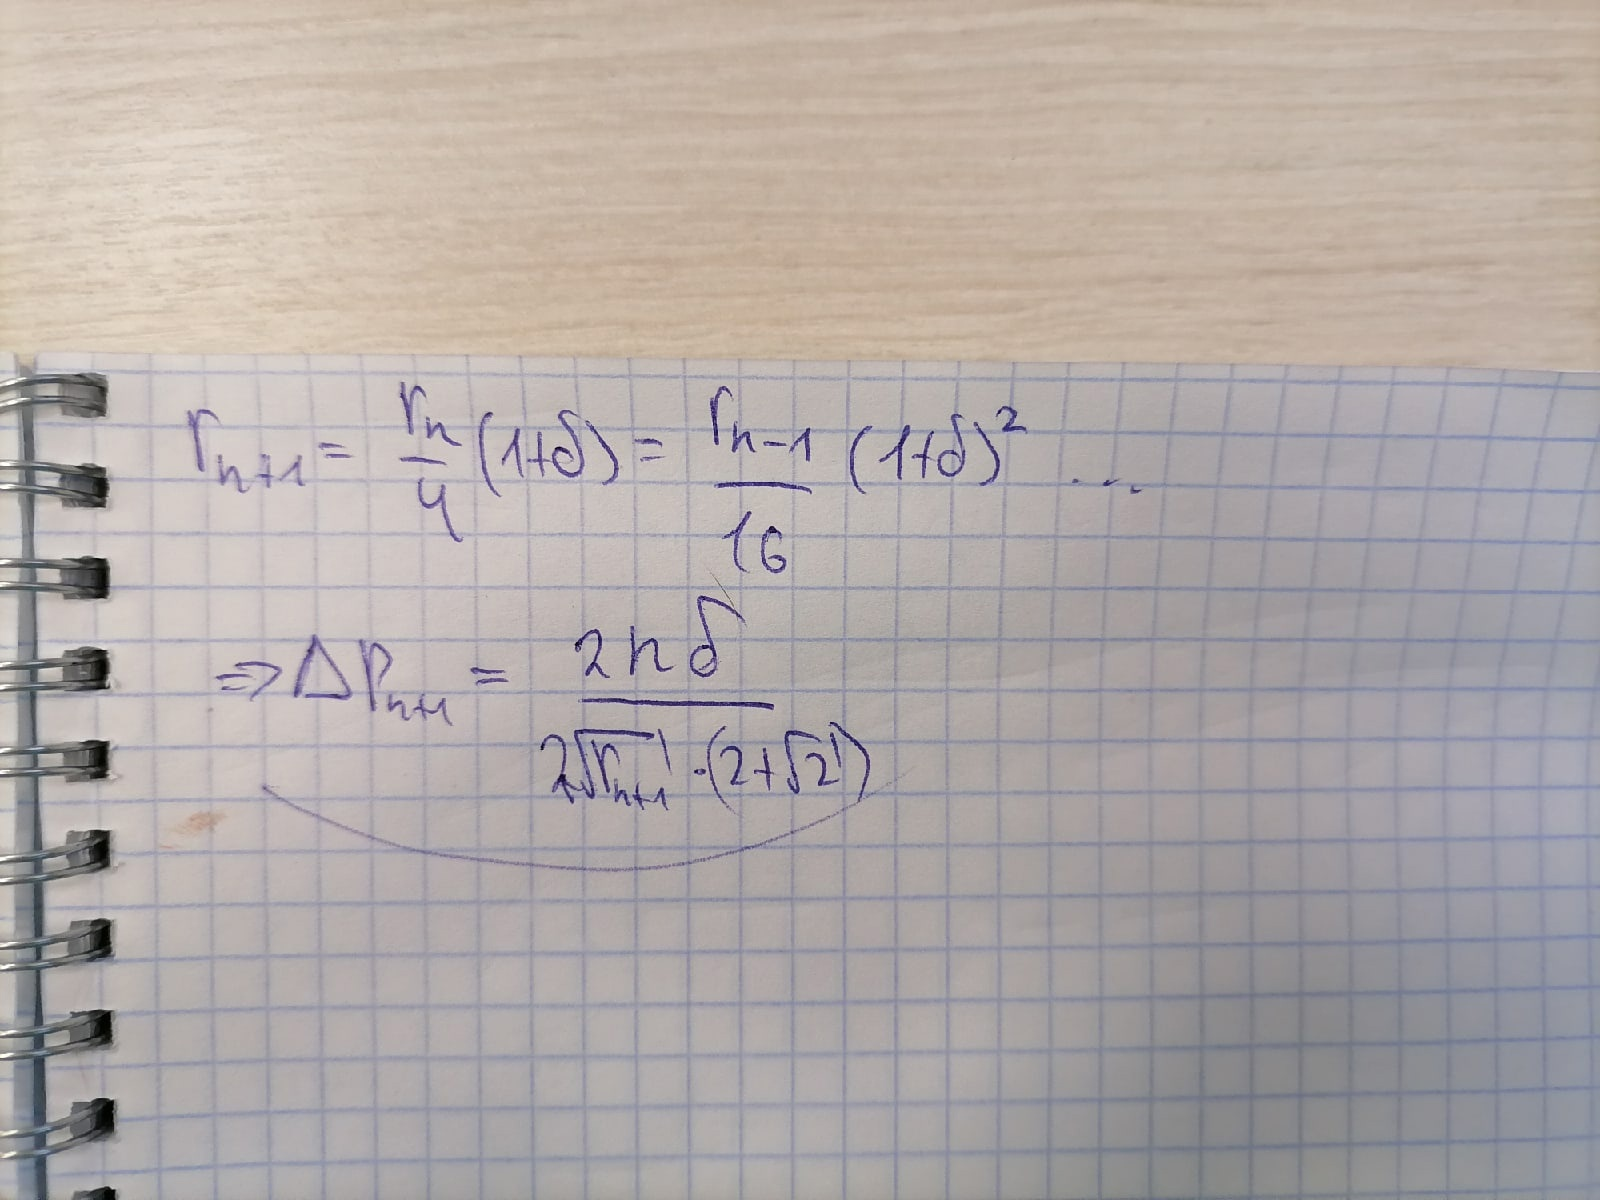

In [ ]:
def calculate_perim_v2(n = 2):
    if n <= 3 :
        return 2 * m.sqrt(2)
    return m.power(2, n-1) * m.sqrt(calculate_r(n))
def calculate_r(n):
    if  n <= 3:
        return 2/(2 + m.sqrt(2))
    r_nmin1 = calculate_r(n-1) 
    return r_nmin1 / (2 + m.sqrt(4 - r_nmin1))

Значения вычислительной ошибки :
3 1.23651685936582067822642e-27
4 6.182584296829103391132098e-28
5 6.063787673182141524391325e-28
6 6.034588878134006253807464e-28
7 6.027319951546514244555181e-28
8 6.025504635465113148556612e-28
9 6.025050926047836582150265e-28
10 6.024937506166840007894283e-28
11 6.024909151663644320417443e-28
12 6.024902063067035783263412e-28
13 6.024900290919708040890177e-28
14 6.024899847882990129680176e-28
15 6.024899737123817778399892e-28
16 6.024899709434025135987432e-28
17 6.024899702511577003222292e-28
18 6.024899700780964971770881e-28
19 6.02489970034831196401677e-28
20 6.024899700240148712085039e-28
21 6.024899700213107899102531e-28
22 6.02489970020634769585693e-28
23 6.024899700204657645045532e-28
24 6.024899700204235132342682e-28
25 6.02489970020412950416697e-28
26 6.024899700204103097123042e-28
27 6.02489970020409649536206e-28
28 6.024899700204094844921814e-28
29 6.024899700204094432311753e-28
30 6.024899700204094329159238e-28
31 6.0248997002040943033711

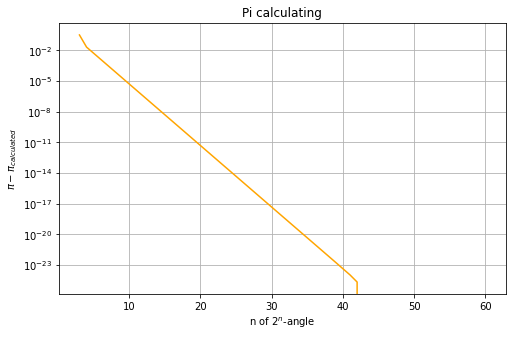

In [39]:
values = np.arange(3, 61)
#print(values)
perimeters = np.array(list(map(calculate_perim_v2, values)))
powers_2 = np.array((list((map(lambda x: m.power(2,x), values)))))
print("Значения вычислительной ошибки :")
arr = (perimeters/powers_2)**2
for i in range(3,40):
    mul2 = eps * 2/(2+m.sqrt(2))
    sigma_perimv2 = mul2 /(2**i * m.sqrt(calculate_r(i-1)))   
    print (i, sigma_perimv2)

#print(powers_2 * m.sqrt(2) * m.sqrt(eps))
    
for i in np.arange(3, 61):
    #print(i, perimeters[i - 3], "  sigma:", pi - perimeters[i - 3] )
    perimeters[i-3] = pi - perimeters[i-3]
#print("  ", pi) 
#print("Точное значение (25 знаков)")
plot_log(values, perimeters)

Видно, что вычислительная ошибка не накапливается при вычислении.

###### Используя рекурсивную формулу пункта 1, подсчитаем число пи для n от 3 до 60 (мантисса = 25): 

In [ ]:
m.mp.dps = 25

In [ ]:
values = np.arange(3, 61)
#print(values)
perimeters = list(map(calculate_perim, values))

for i in np.arange(3, 61):
    print(i, perimeters[i - 3], "  sigma:", pi - perimeters[i - 3] )
    perimeters[i-3] = pi - perimeters[i-3]
print("  ", pi) 
print("Точное значение (25 знаков)")
plot_log(values, perimeters)

###### Используя рекурсивную формулу пункта 1, подсчитаем число пи для n от 3 до 60 (мантисса = 50): 

In [ ]:
m.mp.dps = 50

In [ ]:
values = np.arange(3, 61)
#print(values)
perimeters = list(map(calculate_perim, values))
for i in np.arange(3, 61):
    print(i, perimeters[i - 3],"  sigma:", pi - perimeters[i - 3]  )
    perimeters[i-3] = pi - perimeters[i-3]
print("  ", pi) 
print("Точное значение (50 знаков)")
plot_log(values, perimeters)

###### Используя рекурсивную формулу пункта 1, подсчитаем число пи для n от 3 до 60 (мантисса = 100): 

In [ ]:
m.mp.dps = 100

In [ ]:
values = np.arange(3, 61)
#print(values)
perimeters = list(map(calculate_perim, values))
for i in np.arange(3, 61):
    print(i, perimeters[i - 3])
    perimeters[i-3] = pi - perimeters[i-3]
print("  ", pi) 
print("Точное значение (100 знаков)")
plot_log(values, perimeters)

###### Используя рекурсивную формулу пункта 1, подсчитаем число пи для n от 3 до 60 (мантисса = 200): 

In [ ]:
m.mp.dps = 200

In [ ]:
values = np.arange(3, 61)
#print(values)
perimeters = list(map(calculate_perim, values))
for i in np.arange(3, 61):
    print(i, perimeters[i - 3])
    perimeters[i-3] = pi - perimeters[i-3]
print("  ", pi) 
print("Точное значение (200 знаков)")
plot_log(values, perimeters)

### Небольшой итог

    При мантиссе, равной 25, точность вычисления составляет 13 знаков.
    При мантиссе, равной 50, точность составляет 26 знаков.
    При мантиссе, равной 100, точность составляет 35 знаков.
    При мантиссе, рвной 200, точность составляет 35 знаков.

##### Попробуем использовать вторую формулу, указанную в оглавлении. Это - выражение первой формулы, но по сути использующая меньшее количество корней (и больше простых операций) вследствие чего должна вырасти точность определения числа Пи.

In [43]:
m.mp.dps = 100

3 3.061467458920718173827679872243190934090756499885016331470405085020368271680717537896110282738268377
4 3.121445152258052285572557895632355854843065884031276924072033431916213100574793283605204947745446108
5 3.136548490545939263814258044436539067556373541360018152232479353900393689250801177827554468682193906
6 3.140331156954752912317118524331690132143703233648186893447843409226620132093488436622129095155246321
7 3.141277250932772868062019770788214408379663262649789129824867044927097361586525961491274380225786744
8 3.141513801144301076328515059456822307935313815492928009789868351167455172565255655412623785954502487
9 3.141572940367091384135800110270761429533637794504360630647019674089791720688888220569832031359651723
10 3.141587725277159700628854262701918739399280858574843286678421400551216704533146781507679194480102704
11 3.141591421511199973997971763740833955747562650086180797675232600350217806532080723667742169640627401
12 3.141592345570117742340375994157369930305206075651203808028

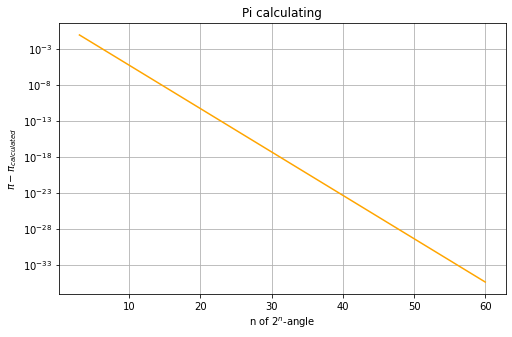

In [44]:
values = np.arange(3, 61)
#print(values)
perimeters = list(map(calculate_perim, values))
for i in np.arange(3, 61):
    print(i, perimeters[i - 3])
    perimeters[i-3] = pi -  perimeters[i-3]
print("  ", pi) 
print("Точное значение (100 знаков)")
plot_log(values, perimeters)

##### Опять таки, получили, что точность подсчёта числа Пи при мантиссе 100 составила 35 знаков.

Но теперь покажем, что формула 2 намного более совершенна, чем формула 1, в плане компьютерных вычислений.
Увеличим n (число степеней n-угольников до 200) И сравним, как будет работать первая формула и вторая (при мантиссе 100).

3 3.061467458920718173827679872243190934090756499885016331470405085020368271680717537896110282738268377
4 3.121445152258052285572557895632355854843065884031276924072033431916213100574793283605204947745446108
5 3.136548490545939263814258044436539067556373541360018152232479353900393689250801177827554468682193906
6 3.140331156954752912317118524331690132143703233648186893447843409226620132093488436622129095155246321
7 3.141277250932772868062019770788214408379663262649789129824867044927097361586525961491274380225786744
8 3.141513801144301076328515059456822307935313815492928009789868351167455172565255655412623785954502487
9 3.141572940367091384135800110270761429533637794504360630647019674089791720688888220569832031359651723
10 3.141587725277159700628854262701918739399280858574843286678421400551216704533146781507679194480102704
11 3.141591421511199973997971763740833955747562650086180797675232600350217806532080723667742169640627401
12 3.141592345570117742340375994157369930305206075651203808028

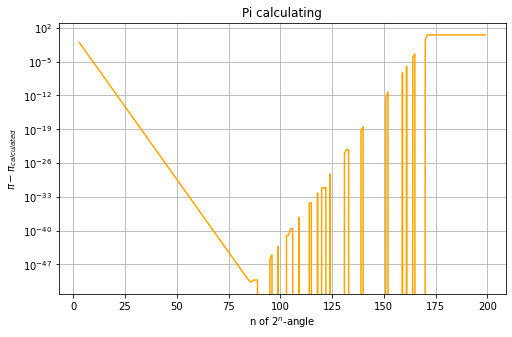

In [45]:
values = np.arange(3, 200)
#print(values)
perimeters = list(map(calculate_perim, values))
for i in np.arange(3, 200):
    print(i, perimeters[i - 3])
    perimeters[i-3] = pi -  perimeters[i-3]
print("  ", pi) 
print("Точное значение (100 знаков)")
plot_log(values, perimeters)

Первая формула после правильных 48-49 знаков числа Пи начинает сильно расходиться. На первую формулу влияет и длина мантиссы, поскольку, если её увеличить, то и расходиться формула начнёт позже, и будет вычислено больше правильных знаков числа Пи

А теперь посмотрим, что происходит со второй формулой:

3 2.828427124746190097603377448419396157139343750753896146353359475981464956924214077700775068655283145
4 3.121445152258052285572557895632355854843065884031276924072033431916213100574793283605204947745446108
5 3.136548490545939263814258044436539067556373541360018152232479353900393689250801177827554468682193906
6 3.14033115695475291231711852433169013214370323364818689344784340922662013209348843662212909515524632
7 3.141277250932772868062019770788214408379663262649789129824867044927097361586525961491274380225786744
8 3.141513801144301076328515059456822307935313815492928009789868351167455172565255655412623785954502489
9 3.141572940367091384135800110270761429533637794504360630647019674089791720688888220569832031359651657
10 3.141587725277159700628854262701918739399280858574843286678421400551216704533146781507679194480102279
11 3.141591421511199973997971763740833955747562650086180797675232600350217806532080723667742169640626417
12 3.1415923455701177423403759941573699303052060756512038080283

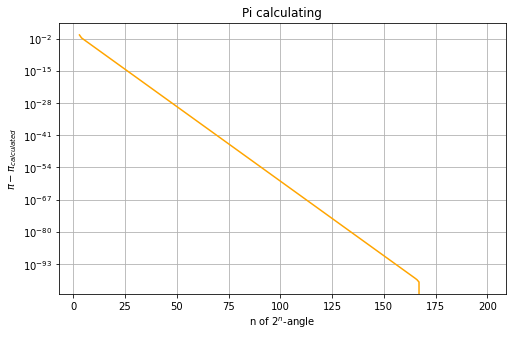

In [46]:
values = np.arange(3, 200)
#print(values)
perimeters = list(map(calculate_perim_v2, values))
for i in np.arange(3, 200):
    print(i, perimeters[i - 3])
    perimeters[i-3] = pi -  perimeters[i-3]
print("  ", pi) 
print("Точное значение (100 знаков)")
plot_log(values, perimeters)

Видим, что второй формуле всё равно на длину мантиссы. Она высчитывает ровно столько знаков числа Пи, сколько помещается в мантиссу 

In [40]:
m.mp.dps = 1000

   3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642

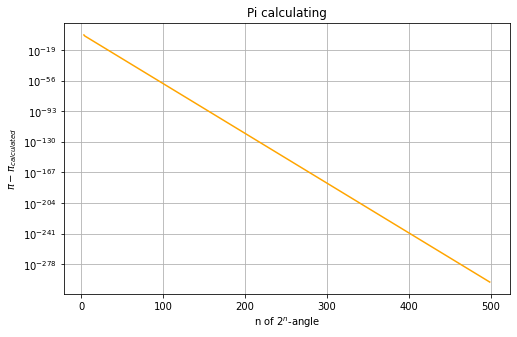

In [41]:
values = np.arange(3, 500)
#print(values)
perimeters = list(map(calculate_perim_v2, values))
for i in np.arange(3, 500):
    #print(i, perimeters[i - 3])
    perimeters[i-3] = pi -  perimeters[i-3]
print("  ", pi) 
print("Точное значение (1000 знаков)")
plot_log(values, perimeters)

###### Бонус: метод Монте-Карло для вычисления числа Пи 

В чём заключается: бросаем точку в квадрате со стороной 1, и вписанной в него окружностью диаметром 1. Смотрим, попала ли она в окружность. Повторяем k итераций. Делим число точек, попавших в окружность, на число всех брошенных точек - и получаем некоторое приближение числа Пи. По сути, используется соображение площадей, ведь $ \dfrac{\pi r^2}{(2r)^2} = \dfrac{\pi}{4}$, а искомое отношение точек (распределение их вероятности) пропорционально площадям при равномерном распределении этих точек

In [ ]:
points_in_circle = 0
for i in np.arange(100000):
    #print(x[i])
    x = m.rand()
    y = m.rand()
    val = m.sqrt(m.power(x,2) + m.power(y, 2))
    if val <= 1:
        points_in_circle += 1
pi_rand = 4 * points_in_circle/100000
print(pi_rand)

Число Пи (с хорошим кол-вом знаков) очень сложно вычислить этим методом за разумное время.  